In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
# from tqdm import tqdm
import setglobals as gl
import sl3_fit as sl3
import utils
import model as mo

fingers = [0, 1, 2, 3, 4]
iti = 500
total_sub_num = 16

announcement_freq = 5
n_trials_per_block = 20
n_trials_per_day = 400
n_blocks_per_day = 20
n_days = 3


In [8]:
D = pd.read_csv(gl.result_dir + 'SL3_all_trial_data.tsv',sep='\t')
D.columns

Index(['BN', 'TN', 'startTR', 'lastTrial', 'startTime', 'seqType', 'announce',
       'feedback', 'complete', 'iti', 'resp1', 'RT1', 'pressT1', 'resp2',
       'RT2', 'pressT2', 'resp3', 'RT3', 'pressT3', 'resp4', 'RT4', 'pressT4',
       'resp5', 'RT5', 'pressT5', 'MT', 'seqError', 'hardPress', 'latePress',
       'incompletePress', 'trialPoints', 'trialType', 'sounds', 'board', 'day',
       'SubNum', 'seqPressed', 'IPI1', 'IPI2', 'IPI3', 'IPI4', 'IPI0', 'ET'],
      dtype='object')

In [16]:
D['error'] = D.seqError>0
pd.pivot_table(D, index=['SubNum'], columns='day',values='error', aggfunc='mean')

day,1,2,3
SubNum,,,
1,0.0825,0.1350,0.1500
2,0.0775,0.1150,0.1750
3,0.1450,0.1925,0.2250
4,0.1625,0.2100,0.2475
5,0.0825,0.1100,0.1350
6,0.1325,0.1625,0.1625
7,0.1575,0.1850,0.2075
8,0.2800,0.1775,0.1925
9,0.1750,0.1625,0.2700


/var/folders/2f/x5fxqvls6nv4ym5905k0s9vr0000gp/T/ipykernel_25853/1849915684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D.MTe[D.MT>5000] = 5000
/var/folders/2f/x5fxqvls6nv4ym5905k0s9vr0000gp/T/ipykernel_25853/1849915684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D.MTe[D.error] = 5000


<Axes: xlabel='speed', ylabel='Count'>

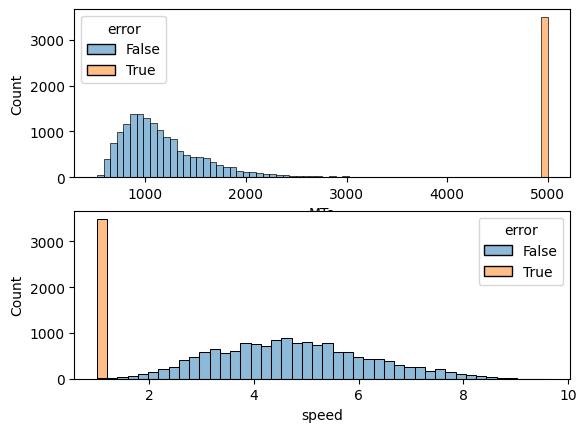

In [38]:
D['MTe'] = D.MT
D.MTe[D.MT>5000] = 5000
D.MTe[D.error] = 5000
plt.subplot(2,1,1)
sns.histplot(D,x='MTe',hue='error')
D['speed'] = 1/D.MTe*1000*5
plt.subplot(2,1,2)
sns.histplot(D,x='speed',hue='error')


In [36]:
# Make a new data framw with the average speed per block
Dblock = D[D.error==0].groupby(['SubNum','day','BN']).agg({'speed':'mean','MT':'median'}).reset_index()


<Axes: xlabel='BN', ylabel='MT'>

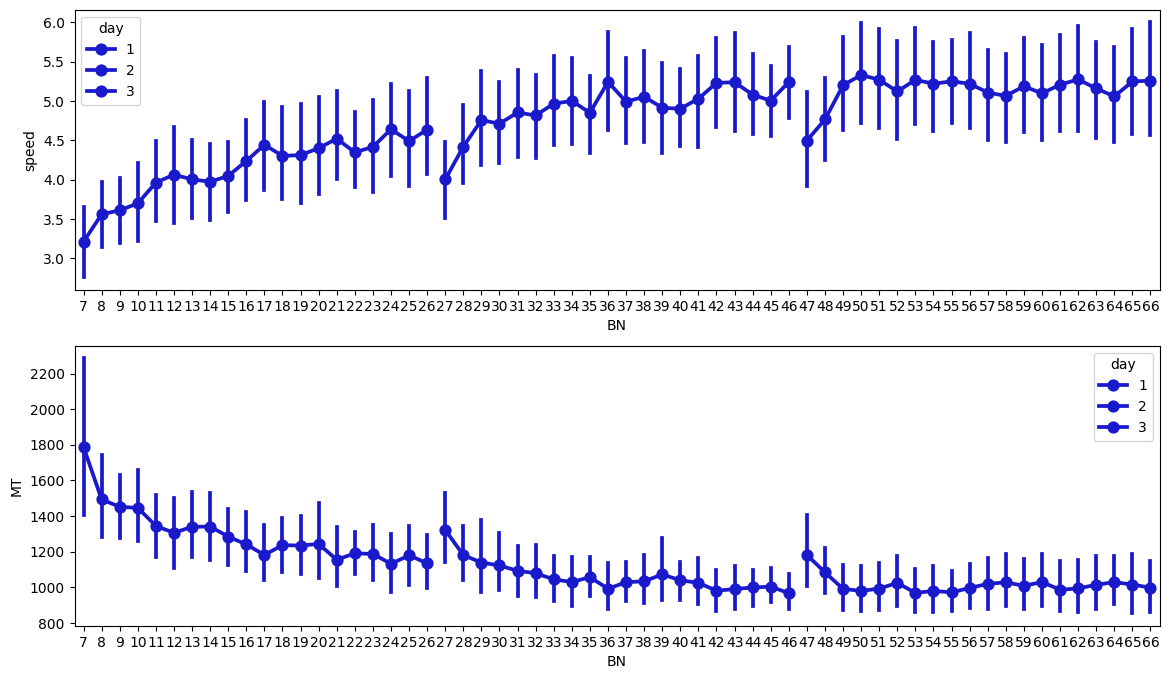

In [ ]:
plt.figure(figsize=(14,8))
c=np.array([0.1,0.1,0.8])
pal=[c,c,c]
plt.subplot(2,1,1)
sns.pointplot(Dblock,x='BN',y='speed',hue='day',palette=pal)
plt.subplot(2,1,2)
sns.pointplot(Dblock,x='BN',y='MT',hue='day',palette=pal)


<Axes: xlabel='BN_in_day', ylabel='speed'>

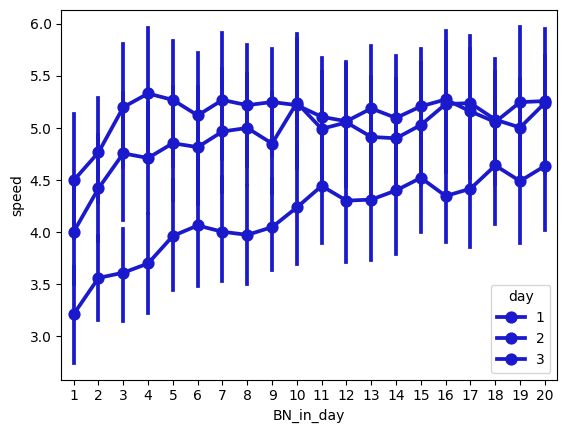

In [ ]:
Dblock['BN_in_day'] = (Dblock.BN  - (Dblock.day-1)*n_blocks_per_day - 6)
sns.pointplot(Dblock,x='BN_in_day',y='speed',hue='day',palette=pal)

<Axes: xlabel='TN', ylabel='speed'>

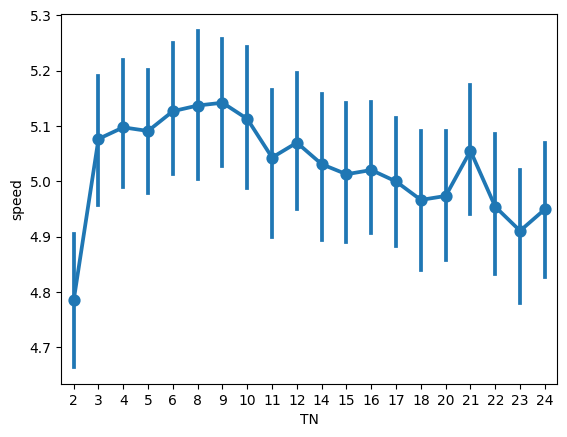

In [90]:
D['BN_in_day'] = (D.BN  - (D.day-1)*n_blocks_per_day - 6)
T=D[(D.error==0) & (D.day>1)]

Dtrial = T.groupby(['SubNum','TN']).agg({'speed':'mean','MT':'median'}).reset_index()
sns.pointplot(T,x='TN',y='speed')

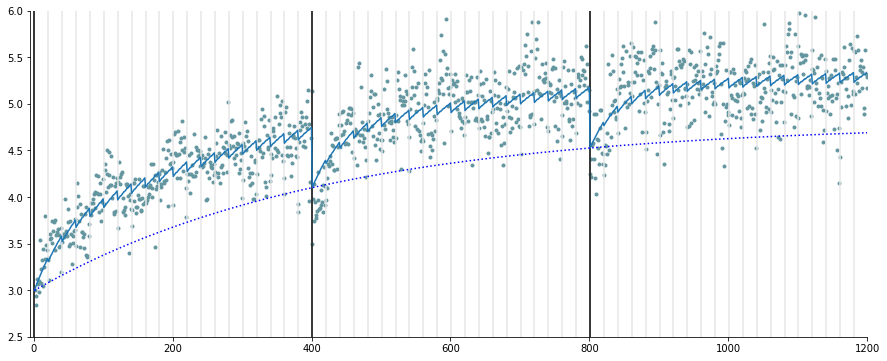

In [19]:
D= sl3.get_data('all')
M = mo.LdModel_additive()
M = mo.fit_model(D,M)
yp,z_fast,z_slow,z_fatigue = M.predict(D.time)
z_slow = M.y0 + z_slow
D['yp'] = yp
D['z_slow'] = z_slow
plt.figure(1,figsize=(15,6))
sl3.plot_data(D)
ax=plt.gca()
ax.set_ylim(2.5,6.0)

plt.savefig(gl.result_dir + 'SL3_all_data.pdf')

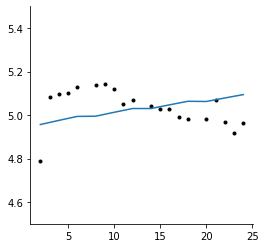

In [18]:
plt.figure(1,figsize=(4,4))
sl3.plot_trial(D)
ax=plt.gca()
ax.set_ylim(4.5,5.5)
plt.savefig(gl.result_dir + 'SL3_all_trial.pdf')